# Project 3

This project looks at keywords used in different articles and extracts different connections the keywords have to other keywords used in the articles. Extraction of such data and insights are valuable in the modern society. As businesses are moving online and are generating vast amount of data, a lot of knowledge are being collected. Harnessing these information can assist businesses in some crucial ways. Following are a few examples that display the ways businesses can benefit from projects like this. 

Example 1.In articles such as the ones in the dataset, extracting which keywords are being used the most can give us an idea about the topic of the article. 

Example 2. Having this information can then allow us to use this information to promote the article to read to customers who enjoy reading articles of similar topic.

Example 3. These insights can also be used to perform SEO, by targeting these keywords to promote one's business.

Let us dive into the tasks to complete this project. 


### **Task 1:** Import the Dataset for use in your Notebook.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Feb/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN


### **Task 2:**  Write a Python code to extract keyword data from the above file. 

#### Step 1: Get rid of title column 
#### Step 2: Create a definitiation to get rid of NaN value and create a list of combination of keywords 
#### Step 3: Apply the definition in step 2 to all the rows 

In [4]:
from itertools import combinations
import numpy as np
import networkx as nx

# At first, we will drop the 'Title' column and any rows that are completely NaN across keywords
keyword_data = data.drop(columns=['Title']).dropna(how='all')

#Function to process each row of the dataframe and extract keyword pairs
def get_keyword_pairs(row):
    
    # Drop NaN values and convert to a list
    keywords = row.dropna().tolist() #use .tolist to convert array into list
    
    #generate all possible combinations of keyword pairs within this row
    keyword_pairs = list(combinations(keywords, 2)) #Use combinations function to create keywords combination pair of 2
    return keyword_pairs

# Apply the def get_keywords_pairs to each row and concatenate the lists
keyword_pairs_list = keyword_data.apply(get_keyword_pairs, axis=1).sum() #use .sum & axis =1 to concatenate across each row

### **Task 3:**  Read the adjacency matrix and convert it into a weighted network

Step 1: Get unique keywords 

In [5]:
#1: Flatten the keyword pair list and get the unique keywords, 
#2: Create an array of unique keyword list 
#3: Use nested for loop to create list of unique keyword 
unique_keywords = pd.Series([keyword for pair in keyword_pairs_list for keyword in pair]).unique()

Step 2: Create a weighted adjacency matrix

In [6]:
# Create an empty dataframe with unique keywords as both columns and index 
#fill the empty dataframe with zeroes using .fillna(0)
adjacency_matrix = pd.DataFrame(index=unique_keywords, columns=unique_keywords).fillna(0) 

#Count the occurrences of each keyword pair to get weights
keyword_pair_counts = pd.Series(keyword_pairs_list).value_counts() #Convert into pd series and use value_counts function to calculate weights 

# Fill the adjacency matrix with weights 
for pair, weight in keyword_pair_counts.items(): #initiate 'for loop' to iterate over items in keyword_pair_counts
    adjacency_matrix.loc[pair[0], pair[1]] += weight #add weight to the current value by using += operator
    adjacency_matrix.loc[pair[1], pair[0]] += weight  #undirected graph, bidirectional

Step 3: Convert adjacency matrix to a weighted network 

In [7]:
# Convert the adjacency matrix to a weighted network
#following code is from networkx.org website 
G = nx.from_pandas_adjacency(adjacency_matrix) #create a network using G function from nx library

### **Task 4:**  Compute node degree and strength

In [8]:
# Node degree is the number of edges incident to the node -- definition from networkx.org 
degrees = dict(G.degree()) #calculate degree node and put node and degree values in a dictionary

# Node strength is the sum of edge weights of edges incident to that node -- definition from networkx.org
strengths = dict(G.degree(weight='weight')) #directing the formula to consider weight of edges 

### **Task 5:**  Show the top 10 nodes by degree and top 10 nodes by strength


In [9]:
# Convert degree and strength dictionaries to sorted lists for easy access to top values
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True) #sort by the second element by using x:x[1] and reverse the list so that the highest values will show first 
sorted_strengths = sorted(strengths.items(), key=lambda x: x[1], reverse=True)

# Display the top 10 nodes by degree and by strength
top_10_degrees = sorted_degrees[:10] #slice to show first ten tuples
top_10_strengths = sorted_strengths[:10] #show first ten tuples 

top_10_degrees, top_10_strengths

([('ORGANIZATIONAL behavior', 166),
  ('ORGANIZATIONAL effectiveness', 104),
  ('MANAGEMENT science', 102),
  ('PERSONNEL management', 93),
  ('DECISION making', 90),
  ('ORGANIZATIONAL structure', 74),
  ('ORGANIZATIONAL sociology', 66),
  ('STRATEGIC planning', 66),
  ('INDUSTRIAL management', 64),
  ('CORPORATE governance', 62)],
 [('ORGANIZATIONAL behavior', 265),
  ('ORGANIZATIONAL effectiveness', 144),
  ('MANAGEMENT science', 136),
  ('PERSONNEL management', 126),
  ('DECISION making', 112),
  ('ORGANIZATIONAL structure', 107),
  ('ORGANIZATIONAL sociology', 96),
  ('CORPORATE governance', 85),
  ('INDUSTRIAL management', 84),
  ('STRATEGIC planning', 80)])

### **Task 6:** Show the top 10 node pairs by weight

In [10]:
# Recalculate top node pairs by weight 
#formula from by hands on lab 11 
edge_weights = [(node1, node2, data['weight']) for node1, node2, data in G.edges(data=True)]
edge_df = pd.DataFrame(edge_weights, columns=['Node 1', 'Node 2', 'Weight'])
#find top 10 weights
top_weight_pairs = edge_df.nlargest(10, 'Weight')
top_weight_pairs

,Node 1,Node 2,Weight
172,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,11
309,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,9
281,ORGANIZATIONAL behavior,PERSONNEL management,8
271,ORGANIZATIONAL behavior,MANAGEMENT science,7
17,ORGANIZATIONAL sociology,ORGANIZATIONAL behavior,6
206,ORGANIZATIONAL effectiveness,ORGANIZATIONAL structure,6
268,ORGANIZATIONAL behavior,CORPORATE governance,6
290,ORGANIZATIONAL behavior,DECISION making,6
45,ORGANIZATIONAL sociology,TEAMS in the workplace,5
303,ORGANIZATIONAL behavior,INDUSTRIAL relations,5


### **Task 7:** Plot average strength on y-axis and degree on x-axis

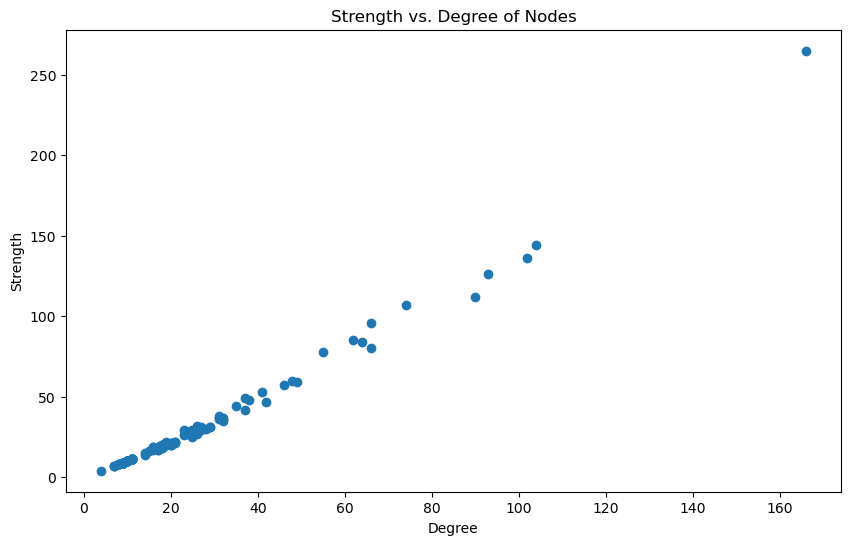

In [11]:
import matplotlib.pyplot as plt

# Prepare data for plotting
degrees_values = [degrees[node] for node in G.nodes()]
strengths_values = [strengths[node] for node in G.nodes()]

# Plot strength vs. degree
plt.figure(figsize=(10, 6))
plt.scatter(degrees_values, strengths_values)
plt.title('Strength vs. Degree of Nodes')
plt.xlabel('Degree')
plt.ylabel('Strength')
plt.show()


In this project, I at first uploaded the data. After uploading the data, I wrangled data by filtering out the title column as it is not useful, since we are only looking at keywords. I also took out columns with null values. I defined get_keywords_function and applied it to all the rows containing keywords from an article. Then the list of keywords is flattened and an empty array filled with the number zero is created where the index and columns are the unique keywords. Whenever these keyword pairs in index and columns are connected their weights increase. I then calculated degree and strength of individual nodes using g.degree from nx library, following examples in the networkx.org website. I sorted the nodes by the degree and strength. Then, I sorted top 10 node pairs by weight. Lastly, I plotted strength vs. degree, which shows that strength and the degree have a linear relationship. This indicates that in this dataset, higher connection to a node in this dataset also indicates higher strength. 